<a href="https://colab.research.google.com/github/gkunal8019/Find_your_doccumnet_by_llm/blob/main/Find_your_do_doccumnet_by_llm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/run-llama/llama_index/blob/main/docs/docs/examples/chat_engine/chat_engine_context.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Chat Engine - Context Mode

ContextChatEngine is a simple chat mode built on top of a retriever over your data.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


For each chat interaction:
* first retrieve text from the index using the user message
* set the retrieved text as context in the system prompt
* return an answer to the user message

This approach is simple, and works for questions directly related to the knowledge base and general interactions.

If you're opening this Notebook on colab, you will probably need to install LlamaIndex 🦙.

In [2]:
%pip install llama-index-llms-openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 55.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.7/383.7 kB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.6/326.6 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 54.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 48.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.7 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0
  Attempting uninstall: nltk
    Found existing installation: nltk 3.8.1
    Uninstalling nltk-3.8.1:
      Successfully uninstalled nl

In [3]:
!pip install llama-index

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.8/173.8 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.8/295.8 kB 11.8 MB/s eta 0:00:00


## Download Data

In [4]:
!mkdir -p 'data/paul_graham/'
!wget 'https://raw.githubusercontent.com/run-llama/llama_index/main/docs/docs/examples/data/paul_graham/paul_graham_essay.txt' -O 'data/paul_graham/paul_graham_essay.txt'

--2024-10-08 07:46:48--  https://raw.githubusercontent.com/run-llama/llama_index/main/docs/docs/examples/data/paul_graham/paul_graham_essay.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 75042 (73K) [text/plain]
Saving to: ‘data/paul_graham/paul_graham_essay.txt’

data/paul_graham/pa 100%[===================>]  73.28K  --.-KB/s    in 0.002s  

2024-10-08 07:46:48 (29.2 MB/s) - ‘data/paul_graham/paul_graham_essay.txt’ saved [75042/75042]



## Get started in 5 lines of code

Load data and build index

In [5]:
import openai
import os

os.environ["OPENAI_API_KEY"] = ""
openai.api_key = os.environ["OPENAI_API_KEY"]

In [6]:
!pwd

/content


In [7]:
# import os
# from llama_index.core import VectorStoreIndex, SimpleDirectoryReader

# # Define the directory containing your Markdown files
# input_dir = "./drive/MyDrive/ccs_computer/icmr_parsed/"

# # Initialize a list to hold the data
# all_data = []

# # Loop through each subdirectory and file in the specified directory
# for root, dirs, files in os.walk(input_dir):
#     for file in files:
#         if file.endswith('.md'):  # Check if the file is a Markdown file
#             file_path = os.path.join(root, file)  # Get the full path of the file

#             try:
#                 # Read the data from the Markdown file
#                 reader = SimpleDirectoryReader(input_dir=file_path)
#                 data = reader.load_data()
#                 all_data.extend(data)  # Add the loaded data to the list
#             except ValueError as e:
#                 print(f"Error: {e}. Skipping {file_path}.")
#             except Exception as e:
#                 print(f"An unexpected error occurred: {e}. Skipping {file_path}.")

# # Create the index from all collected data
# index = VectorStoreIndex.from_documents(all_data)

# # Optional: Display the number of documents loaded
# print(f"Loaded {len(all_data)} documents into the index.")

In [8]:
'/content/drive/MyDrive/ccs_computer/sample'

'/content/drive/MyDrive/ccs_computer/sample'

In [9]:
from llama_index.core import VectorStoreIndex, SimpleDirectoryReader
data = SimpleDirectoryReader(
    input_dir="./drive/MyDrive/ccs_computer/sample",
    required_exts=['.md'],
    recursive=True,
).load_data()
index = VectorStoreIndex.from_documents(data)

In [10]:
len(data)

3

In [11]:


# data = SimpleDirectoryReader(input_dir="./drive/MyDrive/ccs_computer/icmr_parsed/General_Circular_0001_0").load_data()
# index = VectorStoreIndex.from_documents(data)

Configure chat engine

Since the context retrieved can take up a large amount of the available LLM context, let's ensure we configure a smaller limit to the chat history!

In [12]:
from llama_index.core.memory import ChatMemoryBuffer

memory = ChatMemoryBuffer.from_defaults(token_limit=1500)

chat_engine = index.as_chat_engine(
    chat_mode="context",
    memory=memory,
    system_prompt=(
        "You are a chatbot, able to have normal interactions, as well as talk"
        " about an essay discussing Paul Grahams life."
    ),show_source=True,
)

Chat with your data

In [13]:
# Assuming the chat engine is already set up

# Run a query through the chat engine
response = chat_engine.chat("what is icmr")

# # Access the main response text
# print("Response:", response.response)

# # If sources are available, print them
# if hasattr(response, 'source_documents') and response.source_documents:
#     print("\nSources:")
#     for doc in response.source_documents:
#         print(f"Document: {doc.metadata['source']}")  # or access metadata as appropriate
# else:
#     print("No sources found.")


In [14]:
response.sources

[ToolOutput(content='[NodeWithScore(node=TextNode(id_=\'eb4e54d2-37f4-4898-aeb9-0b6fcbf48298\', embedding=None, metadata={\'file_path\': \'/content/drive/MyDrive/ccs_computer/sample/General_Circular02112023_1.md\', \'file_name\': \'General_Circular02112023_1.md\', \'file_type\': \'text/markdown\', \'file_size\': 10731, \'creation_date\': \'2024-10-07\', \'last_modified_date\': \'2024-10-07\'}, excluded_embed_metadata_keys=[\'file_name\', \'file_type\', \'file_size\', \'creation_date\', \'last_modified_date\', \'last_accessed_date\'], excluded_llm_metadata_keys=[\'file_name\', \'file_type\', \'file_size\', \'creation_date\', \'last_modified_date\', \'last_accessed_date\'], relationships={<NodeRelationship.SOURCE: \'1\'>: RelatedNodeInfo(node_id=\'6e6f79a0-6681-4cfa-bb1e-0df95f9d8218\', node_type=<ObjectType.DOCUMENT: \'4\'>, metadata={\'file_path\': \'/content/drive/MyDrive/ccs_computer/sample/General_Circular02112023_1.md\', \'file_name\': \'General_Circular02112023_1.md\', \'file_type

In [15]:
kunal=response.sources[0].content

In [16]:
response.sources[0].content

'[NodeWithScore(node=TextNode(id_=\'eb4e54d2-37f4-4898-aeb9-0b6fcbf48298\', embedding=None, metadata={\'file_path\': \'/content/drive/MyDrive/ccs_computer/sample/General_Circular02112023_1.md\', \'file_name\': \'General_Circular02112023_1.md\', \'file_type\': \'text/markdown\', \'file_size\': 10731, \'creation_date\': \'2024-10-07\', \'last_modified_date\': \'2024-10-07\'}, excluded_embed_metadata_keys=[\'file_name\', \'file_type\', \'file_size\', \'creation_date\', \'last_modified_date\', \'last_accessed_date\'], excluded_llm_metadata_keys=[\'file_name\', \'file_type\', \'file_size\', \'creation_date\', \'last_modified_date\', \'last_accessed_date\'], relationships={<NodeRelationship.SOURCE: \'1\'>: RelatedNodeInfo(node_id=\'6e6f79a0-6681-4cfa-bb1e-0df95f9d8218\', node_type=<ObjectType.DOCUMENT: \'4\'>, metadata={\'file_path\': \'/content/drive/MyDrive/ccs_computer/sample/General_Circular02112023_1.md\', \'file_name\': \'General_Circular02112023_1.md\', \'file_type\': \'text/markdown\

In [17]:
import re

# Sample input string (the output you provided)

# Define a regex pattern to capture id_, text, and score
pattern = r"id_='(.*?)',.*?text='(.*?)',.*?score=(\d+\.\d+)"

# Find all matches in the input string
matches = re.findall(pattern, kunal)

# Create a list of dictionaries to store the extracted data
results = [{'id_': match[0], 'text': match[1], 'score': float(match[2])} for match in matches]

# Print the results
for result in results:
    print(result)

{'id_': 'eb4e54d2-37f4-4898-aeb9-0b6fcbf48298', 'text': 'BA / GRAM\\nSCIENTIFIC\\nww.icmr.nic.in Website icmrhods (@sansad.in गे, ए.बी, एज्स./PABX : 26588980, 26588707, 26589336, 26589745 26589873, 26589414.\\n\\n011-26588662, 011-26589791, 011-265892 भारतीय आयुविज्ञान अनुसंधान परिषद IDIAN COUNCIL OF\\nEDICAL RESEARCH\\nI \\nययय रामलिंगस्यामी भवन, अन्सारी नगर.\\n\\nDEPARTMENT OF HEALTH RESEARCH (MINISTRY  OF HEALTH &  FAMILY)\\nV. RAMALINGASWAMI BHAWAN, ANSARI NAGAR, NEW DELHI\\nक्रमांक.E16/48/2022-प्रशासन/E.Office No.139791 दिनांक:02/11/2023 स मेवा  में,\\nनिदेशक/प्रभारी  निदेशक परिषद के सभी संस्थान/केन्द्र Subject : Normative Standards and Guidelines for conduct of Computer Based Tests (CBT)\\nby Central Government and its agencies for recruitment to various posts and admission to Under Graduate/Post Graduate Courses.\\n\\nमहोदय/महोदया,\\nअधोहस्ताक्षरी  को  उपर्य्क्त  विषय  पर  श्रीमती  जैस्मीन, अवर  सचिव, कार्मिक, लोक  शिकायत और  पेंशन  मंत्रालय, कार्मिक  और  प्रशिक्षण  विभाग, नॉर्थ

In [18]:
pattern = r"id_='(.*?)',.*?text='(.*?)',.*?score=(\d+\.\d+)"

# Find all matches in the input string
matches = re.findall(pattern, kunal)

# Initialize result as an empty list
result = []

# Append each extracted match to the result list
for match in matches:
    result.append({'id_': match[0], 'text': match[1], 'score': float(match[2])})

# Now result contains all values
print(result)

[{'id_': 'eb4e54d2-37f4-4898-aeb9-0b6fcbf48298', 'text': 'BA / GRAM\\nSCIENTIFIC\\nww.icmr.nic.in Website icmrhods (@sansad.in गे, ए.बी, एज्स./PABX : 26588980, 26588707, 26589336, 26589745 26589873, 26589414.\\n\\n011-26588662, 011-26589791, 011-265892 भारतीय आयुविज्ञान अनुसंधान परिषद IDIAN COUNCIL OF\\nEDICAL RESEARCH\\nI \\nययय रामलिंगस्यामी भवन, अन्सारी नगर.\\n\\nDEPARTMENT OF HEALTH RESEARCH (MINISTRY  OF HEALTH &  FAMILY)\\nV. RAMALINGASWAMI BHAWAN, ANSARI NAGAR, NEW DELHI\\nक्रमांक.E16/48/2022-प्रशासन/E.Office No.139791 दिनांक:02/11/2023 स मेवा  में,\\nनिदेशक/प्रभारी  निदेशक परिषद के सभी संस्थान/केन्द्र Subject : Normative Standards and Guidelines for conduct of Computer Based Tests (CBT)\\nby Central Government and its agencies for recruitment to various posts and admission to Under Graduate/Post Graduate Courses.\\n\\nमहोदय/महोदया,\\nअधोहस्ताक्षरी  को  उपर्य्क्त  विषय  पर  श्रीमती  जैस्मीन, अवर  सचिव, कार्मिक, लोक  शिकायत और  पेंशन  मंत्रालय, कार्मिक  और  प्रशिक्षण  विभाग, नॉर्

In [19]:
result # This will print each result on a new line

[{'id_': 'eb4e54d2-37f4-4898-aeb9-0b6fcbf48298',
  'text': 'BA / GRAM\\nSCIENTIFIC\\nww.icmr.nic.in Website icmrhods (@sansad.in गे, ए.बी, एज्स./PABX : 26588980, 26588707, 26589336, 26589745 26589873, 26589414.\\n\\n011-26588662, 011-26589791, 011-265892 भारतीय आयुविज्ञान अनुसंधान परिषद IDIAN COUNCIL OF\\nEDICAL RESEARCH\\nI \\nययय रामलिंगस्यामी भवन, अन्सारी नगर.\\n\\nDEPARTMENT OF HEALTH RESEARCH (MINISTRY  OF HEALTH &  FAMILY)\\nV. RAMALINGASWAMI BHAWAN, ANSARI NAGAR, NEW DELHI\\nक्रमांक.E16/48/2022-प्रशासन/E.Office No.139791 दिनांक:02/11/2023 स मेवा  में,\\nनिदेशक/प्रभारी  निदेशक परिषद के सभी संस्थान/केन्द्र Subject : Normative Standards and Guidelines for conduct of Computer Based Tests (CBT)\\nby Central Government and its agencies for recruitment to various posts and admission to Under Graduate/Post Graduate Courses.\\n\\nमहोदय/महोदया,\\nअधोहस्ताक्षरी  को  उपर्य्क्त  विषय  पर  श्रीमती  जैस्मीन, अवर  सचिव, कार्मिक, लोक  शिकायत और  पेंशन  मंत्रालय, कार्मिक  और  प्रशिक्षण  विभाग, नॉ

In [20]:
hight_light_text=result[0]['text'][:100]

In [21]:
hight_light_text

'BA / GRAM\\nSCIENTIFIC\\nww.icmr.nic.in Website icmrhods (@sansad.in गे, ए.बी, एज्स./PABX : 26588980, '

In [64]:
import os
import re

def search_and_highlight_and_save_md_files(base_directory, highlight_text, output_directory):
    search_pattern = re.compile(
        r'BA\s*/\s*GRAM\s*[\r\n]+\s*SCIENTIFIC\s*[\r\n]+\s*ww\.icmr\.nic\.in\s*Website\s*icmrhods\s*\(@sansad\.in\s*गे,\s*ए\.बी,\s*एज्स\./PABX\s*:\s*26588980,',
        re.IGNORECASE
    )

    modified_files = []

    for dirpath, _, filenames in os.walk(base_directory):
        for filename in filenames:
            if filename.endswith('.md'):
                file_path = os.path.join(dirpath, filename)
                try:
                    with open(file_path, 'r', encoding='utf-8') as file:
                        content = file.read()

                    if search_pattern.search(content):
                        highlighted_text =f"$$\\textcolor{{red}}{{{highlight_text}}}$$" #f"$$\\textcolor{{red}}{{{highlight_text}}}$$"
                        highlighted_content = re.sub(search_pattern, highlighted_text, content)


                        relative_path = os.path.relpath(file_path, base_directory)
                        new_file_path = os.path.join(output_directory, relative_path)

                        new_dir = os.path.dirname(new_file_path)
                        os.makedirs(new_dir, exist_ok=True)

                        with open(new_file_path, 'w', encoding='utf-8') as new_file:
                            new_file.write(highlighted_content)

                        modified_files.append(new_file_path)

                except Exception as e:
                    print(f"Could not process {file_path}: {e}")

    return modified_files if modified_files else "No files were modified."

# Example usage:
base_directory = '/content/drive/MyDrive/ccs_computer/sample'
highlight_text = hight_light_text
output_directory = 'icmi_highlight01'

kunal = search_and_highlight_and_save_md_files(base_directory, highlight_text, output_directory)
print(kunal)

['icmi_highlight01/General_Circular02112023_1.md']


In [73]:
# import re
# from fuzzywuzzy import fuzz

# def search_text_in_md(file_path, search_text, threshold=80):
#     matching_sections = []

#     # Read the markdown file
#     with open(file_path, 'r', encoding='utf-8') as file:
#         content = file.read()

#     # Split the content into sections (by headers, paragraphs, etc.)
#     sections = re.split(r'\n\n+', content)  # Split by empty lines (paragraphs)

#     for section in sections:
#         # Compare the section with the search text using fuzzy matching
#         similarity = fuzz.partial_ratio(search_text.lower(), section.lower())

#         if similarity >= threshold:
#             matching_sections.append({
#                 'section': section.strip(),
#                 'similarity': similarity
#             })

#     return matching_sections


# # Example usage:
# file_path = '/content/drive/MyDrive/ccs_computer/sample/General_Circular02112023_1.md'
# search_text = "BA / GRAM\nSCIENTIFIC\nww.icmr.nic.in Website icmr "
# threshold = 85

# # Call the function
# results = search_text_in_md(file_path, search_text, threshold)

# # Display results
# for result in results:
#     print(f"Matched section (similarity {result['similarity']}%):\n{result['section']}\n")

Matched section (similarity 98%):
BA / GRAM
SCIENTIFIC
ww.icmr.nic.in Website icmrhods (@sansad.in गे, ए.बी, एज्स./PABX : 26588980, 26588707, 26589336, 26589745 26589873, 26589414.



In [69]:
!pip install fuzzywuzzy

In [107]:
import re
from fuzzywuzzy import fuzz
import os

def modify_and_save_md(file_path, search_text, threshold=80, output_dir='highlighted_sections'):
    # Create the output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    # Read the markdown file
    with open(file_path, 'r', encoding='utf-8') as file:
        content = file.read()

    # Prepare the highlighted text

    # Initialize a flag to check if any matches found
    matches_found = False

    # Split the content into sections (by headers, paragraphs, etc.)
    sections = re.split(r'\n\n+', content)  # Split by empty lines (paragraphs)
    # print(sections)

    # Replace occurrences in the entire content
    for section in sections:
        # Compare the section with the search text using fuzzy matching

        similarity = fuzz.partial_ratio(search_text.lower(), section.lower())
        # print(section,":",similarity)
        # print("------------------------------------------------------------------")

        if similarity >= threshold:
            # Replace search text with highlighted text
            highlighted_text = f"$$\\textcolor{{red}}{{{section}}}$$"  #f"$$\\textcolor{{red}}{{{search_text}}}$$"

            content = content.replace(section,highlighted_text)
            # print(content)
            matches_found = True

    # Save the modified content to a new markdown file if matches were found
    if matches_found:
        output_file_path = os.path.join(output_dir, 'modified_highlighted_sections.md')
        with open(output_file_path, 'w', encoding='utf-8') as output_file:
            output_file.write(content)

        print(f"Modified content saved to {output_file_path}")
        return output_file_path
    else:
        print("No matches found above the specified threshold.")

# Example usage:
file_path = '/content/drive/MyDrive/ccs_computer/sample/General_Circular02112023_1.md'
search_text = "BA / GRAM\nSCIENTIFIC\nww.icmr.nic.in Website icmr "
threshold = 85

# Call the function
path=modify_and_save_md(file_path, search_text, threshold)

Modified content saved to highlighted_sections/modified_highlighted_sections.md


In [128]:
import re
from fuzzywuzzy import fuzz
import os

def modify_and_save_md(file_path, search_text, threshold=80, output_dir='highlighted_sections'):
    # Create the output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    # Read the markdown file
    with open(file_path, 'r', encoding='utf-8') as file:
        content = file.read()

    # Prepare the highlighted text

    # Initialize a flag to check if any matches found
    matches_found = False

    # Split the content into sections (by headers, paragraphs, etc.)
    sections = re.split(r'\n\n+', content)  # Split by empty lines (paragraphs)
    # print(sections)

    # Replace occurrences in the entire content
    for section in sections:
        # Compare the section with the search text using fuzzy matching

        similarity = fuzz.partial_ratio(search_text.lower(), section.lower())
        # print(section,":",similarity)
        # print("------------------------------------------------------------------")

        if similarity >= threshold:
            # Replace search text with highlighted text
            highlighted_text = f"$$\\textcolor{{red}}{{{section}}}$$"  #f"$$\\textcolor{{red}}{{{search_text}}}$$"

            content = content.replace(section,highlighted_text)
            # print(content)
            matches_found = True

    # Save the modified content to a new markdown file if matches were found
    if matches_found:
        output_file_path = os.path.join(output_dir, 'modified_highlighted_sections.md')
        with open(output_file_path, 'w', encoding='utf-8') as output_file:
            output_file.write(content)

        print(f"Modified content saved to {output_file_path}")
        return output_file_path
    else:
        print("No matches found above the specified threshold.")

# Example usage:
file_path = '/content/drive/MyDrive/ccs_computer/sample/General_Circular02112023_1.md'
search_text = hight_light_text
threshold = 85

# Call the function
path=modify_and_save_md(file_path, search_text, threshold)

Modified content saved to highlighted_sections/modified_highlighted_sections.md


In [112]:
file_path

'/content/drive/MyDrive/ccs_computer/sample/General_Circular02112023_1.md'

In [108]:
path

'highlighted_sections/modified_highlighted_sections.md'

In [111]:
from IPython.display import Markdown, display
# Read the Markdown file
with open(path, 'r') as file:
    markdown_content = file.read()

# Display the Markdown content
display(Markdown(markdown_content))

$$\textcolor{red}{BA / GRAM
SCIENTIFIC
ww.icmr.nic.in Website icmrhods (@sansad.in गे, ए.बी, एज्स./PABX : 26588980, 26588707, 26589336, 26589745 26589873, 26589414.}$$

011-26588662, 011-26589791, 011-265892 भारतीय आयुविज्ञान अनुसंधान परिषद IDIAN COUNCIL OF
EDICAL RESEARCH
I 
ययय रामलिंगस्यामी भवन, अन्सारी नगर.

DEPARTMENT OF HEALTH RESEARCH (MINISTRY  OF HEALTH &  FAMILY)
V. RAMALINGASWAMI BHAWAN, ANSARI NAGAR, NEW DELHI
क्रमांक.E16/48/2022-प्रशासन/E.Office No.139791 दिनांक:02/11/2023 स मेवा  में,
निदेशक/प्रभारी  निदेशक परिषद के सभी संस्थान/केन्द्र Subject : Normative Standards and Guidelines for conduct of Computer Based Tests (CBT)
by Central Government and its agencies for recruitment to various posts and admission to Under Graduate/Post Graduate Courses.

महोदय/महोदया,
अधोहस्ताक्षरी  को  उपर्य्क्त  विषय  पर  श्रीमती  जैस्मीन, अवर  सचिव, कार्मिक, लोक  शिकायत और  पेंशन  मंत्रालय, कार्मिक  और  प्रशिक्षण  विभाग, नॉर्थ  ब्लॉक, नई  दिल्ली  के  दिनांक  18.10.2023  के
पत्र  संख्या  39020/14/2023-Estt.(B) की  प्रति  सूचना  एवं  अनुपालन  हैतु  अग्रेषित  करने  का  निदेश  ह्आ है I
Digitally Signed by Jagdish भवदीय, Rjesh Date: 02-11-2023 16:55:06 Reason: Approved जगदीश राजेश सहायक  महानिदेशक  (प्रशासन)
अन्लंग्नक:यथोक्त पपपप 1. महानिदेशक/वरि.उपमहानिदेशक (प्रशा.)/वरि.वित्त सलाहकार के निजी सचिव 2. परिषद के सभी प्रभाग प्रमुख 3. उपमहानिदेशक  (प्रशा.)/सहा.  महानिदेशक  (प्रशा.)
4. प्रमुख बीएमआई - आईसीएमआर की वेबसाइट पर अपलोड करने के अनुरोध के साथ।

| Tel: +91-11-2658895 / 26588980 / 26589794
   |
|---|

| वी. रामलिंगस्यामी भवन, फोरट बॉक्स नं. 4911, अंसारी नगर, नई. दिल्ली - 110 029, भारत   |
|--------------------------------------------------------------------|
| V, Ramalingaswami Bhawan, P.O. Box No. 4911,                       |
| Ansari Nagar, New Delhi - 110 029, India                           |

Email https://email.gov.in/h/printmessage?id=390346&tz=Asia/Kolkata&xim=1 G ICMR
[Secy+goi] DoPT's Order dated 18.10.2023 reg. Normative Standards and Guidelines for conduct of CBTs by Central Govt.

From : KUNALDHAKA <kunal.dhaka@gov.in>
Wed, Oct 18, 2023 06:42 PM
�1 attachment Subject : [Secy-goi] DoPT's Order dated 18.10.2023 reg.

Normative Standards and Guidelines for conduct of CBTs by Central Govt.

To : To all Secretaries <secy-goi@lsmgr.nic.in>
Cc : Sonal Yadav <sonal.y13@nic.in>, sp pant
<pant.sp13@nic.in>, Ms JASMINE <jasmine.bhardwaj@nic.in>
Sir/Madam Please find the DoPT's Order No.39020/14/2023-Estt.B dated 18.10.2023 regarding "Normative Standards and Guidelines for conduct of CBTs by Central Government and its agencies for recruitment to various posts and admissions to Under Graduate/Post Graduate courses" attached with this e-mail. Regards, Kunal Dhaka, ASO, Estt.B, DOPT
Secy-goi mailing_list -- secy-goi@lsmgr.nic.in To unsubscribe send an email to secy-goi-leave@lsmgr.nic.in Order dated 18.10.23.pdf 1 MB
10/19/2023, 9:56 AM
F.No. 39020/14/2023-Estt.(B)
Government of India Ministry of Personnel, Public Grievances and Pensions Department of Personnel & Training T ****
North Block, New Delhi Dated the 18½ October, 2023

## Order

Subject:Normative Standards and Guidelines for conduct of Computer Based Tests
(CBT) by Central Government and its agencies for recruitment to various posts and admission to Under Graduate /Post Graduate Courses.

Recruitment agencies, including Staff Selection Commission (SSC), Railway Recruitment Boards (RRBs) and Institute of Banking Personnel Selection (IBPS), conduct Computer Based Tests (CBT) for recruitment to various posts in Central Government. Similarly, National Testing Agency (NTA) conducts examinations for combined entrance to Engineering, Medical and other Graduate / Post Graduate Courses. Multiple entities, in addition to the above-mentioned Examination Conducting Agencies (ECAs), include market based Service Providers- digital and physical infrastructure (Examination Centers), and software solutions, that are key stakeholders in ensuring transparent, fair and foolproof conduct of CBTs across the Country.

Past experience in conduct of CBTs by these ECAs, as also by various State ECAs 2. indicates certain digital and physical vulnerabilities that have been exploited through unfair means by unscrupulous elements. While these malpractices are aimed at benefitting a few candidates, it adversely impacts the overall credibility of the Examination and also put to peril success of genuine and sincere candidates and their opportunities.

Based on a detailed analysis of these vulnerabilities and factors that contribute to 3 such vulnerabilities, there is an urgent need for a significant revamp in the current approach including,
(i)
(ii) (iii) (iv)
(V)
Desiloed working of ECAs to a more coordinated and unified shared systems of both planning and conduct of examinations; Normative and Standardized protocols and guidelines that are adopted across ECAs and its Service providers; Model Request for Proposals (RFPs) and Service Levels for procurement of both, i.e., physical examination centers and software solution related services; Access control policy aimed mainly at impersonations and use of appropriate technology; Cyber Security Standard Operating Procedures (SOPs) that are shared and enforced across ECAs and all its Centers and sharing of critical information; Devise Policies that encourage and nurture competitive ecosystem of Service Providers in the Market;
(vi)
Develop and optimize strategies for use of the national pool of resources
(Vii)
so developed across the Central ECAs and also make it available to States as and when requested.

Accordingly, it has been decided, that the National Recruitment Agency (NRA)
4 shall formulate normative standards and guidelines, as required from time to time, which shall be notified.   NRA shall develop protocols and policy frameworks to address issues some of which are listed above. NRA shall also evolve effective means for ensuring compliance of Guidelines and standards by the Central ECAs and Service providers.

Broad indicative areas to be covered under the head 'Normative and Standardized s.

Protocols and Guidelines to be adopted across ECAs and its Service Providers' are listed at Annexure.

These guidelines/ standards, unless otherwise provided, shall apply to Staff G. Selection Commission (SSC), Railway Recruitment Boards (RRBs), Institute of Banking Personnel Selection (IBPS), National Testing Agency (NTA) and such Central Agencies as are conducting examination for recruitment to various posts and admission to Under Graduate /Post Graduate Courses. State Examination Conducting Agencies may also adhere to these guidelines and standards, so as to curb malpractices and ensure leak proof conduct of CBT mode of examinations.

Jasmine)
Under Secretary to the Government of India Tel: 23092508 Copy to :
1. Prime Minister's Office (Ms. Manmeet Kaur, DS).

2. Cabinet Secretariat ( Ms.Smita Sarangi, Director)
Secretaries of all Ministries/Departments of the Government of India.

3.

4. Chairman, Railway Board. 5.  Chairman, Staff Selection Commission.

6.  Chairman, Railway Recruitment Boards.

7. Chairman, National Testing Agency (NTA). 8. Chairman; National Recruitment Agency (NRA).

9. Chairman, Institute of Banking Personnel Selection (IBPS).

10. JD(OL) - For Hindi Version Internal circulation:-
1.  PS to Hon'ble MoS(PP).

2. PSO to Secretary (P).

3. Additional Secretary (PP), DoPT.

4. NIC, DoPT, North Block for uploading the order on DoPT website.

(Jasmine)
Under Secretary to the Government of India Tel: 23092508
: 2 . -
Broad Areas to be covered under the head 'Normative and Standardized protocols and guidelines to be  adopted across ECAs and its Service providers' 1.

Normative and Standardized protocols and Guidelines for Question Banks and its Management/Operation The guidelines shall cover the following areas:
a)  Process of Question Bank creation.

b) Ensuring confidentiality of the entire activity of content development, i.e.,
setting questions, translation and finalization.

c)  Setting up of exclusive question bank.

## 2.

Normative and Standardized protocols and Guidelines for Electronic platform for conducting CBT
The electronic platform on which the CBT is held forms the heart of the CBT. This is an electronic software system which serves as the platform for the entire conduct of the examination. The following aspects related to the electronic platform should be covered through guidelines/standards: -
a) Developing service level specifications/ standards for the electronic platform.

b) Developing/ procuring electronic platforms/ software application & related services.

c)  Insulating the platform from malpractices such as hacking.

d) Transmission of question papers and collection of responses.

e)  Ensuring compatibility and security of the electronic platform.

f) Architecture of the electronic platform.

g) Certification and audit of the system/ electronic platform.

h) Any other aspect connected with development and use of electronic platform.

CBT labs should be controlled centrally and should foilow cyber security norms to be formulated by NRA keeping in view the cyber security guidelines prescribed by MeiTY.

3. Normative and Standardized protocols and Guidelines for Registration Process of the candidates Areas to be addressed:
o a)  Standardizing and ensuring interoperability of all application/registration software and processes.

b)  Preventing impersonation.

c)   Capturing biometric data of the applicants.

d)  Usage of One' Time Registration (OTR).

In [102]:
#kunal

In [103]:
!pip install markdown python-docx
!apt install ocrmypdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 13.3 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript icc-profiles-free libgs9
  libgs9-common libidn12 libijs-0.35 libimagequant0 libjbig2dec0 libqpdf28 libraqm0 mailcap
  mime-support pngquant poppler-data python3-bs4 python3-chardet python3-coloredlogs
  python3-html5lib python3-humanfriendly python3-img2pdf python3-lxml python3-olefile
  python3-packaging python3-pdfminer python3-pikepdf python3-pil python3-pluggy python3-renderpm
  python3-reportlab python3-reportlab-accel python3-soupsieve python3-tqdm python3-webencodings
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd unpaper
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf fonts-texgyre ghostscript-x ocrmypdf-doc
  python-watchdog img2pdf poppler-utils fonts-

In [104]:
# Step 1: Install necessary libraries
!apt-get update
!apt-get install -y ocrmypdf tesseract-ocr tesseract-ocr-eng tesseract-ocr-fra
!pip install PyPDF2

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:4 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:6 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Ign:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Get:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1

In [117]:
file_path

'/content/drive/MyDrive/ccs_computer/sample/General_Circular02112023_1.md'

In [119]:
file = "/content/drive/MyDrive/ccs_computer/sample/General_Circular02112023_1.pdf"

In [120]:
!ocrmypdf --skip-text "{file}" "{output_file}"

Scanning contents: 100% 6/6 [00:00<00:00, 91.00page/s]
Start processing 2 pages concurrently
    1    **** Error: stream operator isn't terminated by valid EOL.
               Output may be incorrect.
   **** Error: stream operator isn't terminated by valid EOL.
               Output may be incorrect.

    2    **** Error: stream operator isn't terminated by valid EOL.
               Output may be incorrect.
   **** Error: stream operator isn't terminated by valid EOL.
               Output may be incorrect.

    3    **** Error: stream operator isn't terminated by valid EOL.
               Output may be incorrect.
   **** Error: stream operator isn't terminated by valid EOL.
               Output may be incorrect.

    4    **** Error: stream operator isn't terminated by valid EOL.
               Output may be incorrect.
   **** Error: stream operator isn't terminated by valid EOL.
               Output may be incorrect.

    3 [tesseract] lots of diacritics - possibly poor OCR
    5 

In [121]:
#  # For handling PDF files

# # Step 2: Upload your PDF file
# from google.colab import files

# uploaded = files.upload()

# # Step 3: Run OCR on the uploaded PDF
# input_file = next(iter(uploaded))  # Get the uploaded file name
# output_file = "ocr_output.pdf"

# # Step 4: Perform OCR on the PDF
# !ocrmypdf --skip-text "{input_file}" "{output_file}"

# # Step 5: Download the output PDF
# files.download(output_file)


In [124]:
import fitz  # PyMuPDF
from IPython.display import display, IFrame

def highlight_text_in_pdf(input_pdf_path, search_text, output_pdf_path="output.pdf"):
    # Open the input PDF
    doc = fitz.open(input_pdf_path)

    # Iterate through all pages
    for pno in range(len(doc)):
        page = doc[pno]

        # Search for the input text on the current page
        rects = page.search_for(search_text)

        # If text is found, highlight all occurrences
        if rects:
            page.add_highlight_annot(rects)

    # Save the modified PDF with highlights
    doc.save(output_pdf_path)
    doc.close()

    # Display the modified PDF in the notebook
    display(IFrame(output_pdf_path, width=600, height=800))

# Example usage
input_pdf_path = "/content/ocr_output.pdf"
search_text = "Normative Standards and Guidelines for conduct"  # The text you want to highlight
output_pdf_path = "output.pdf"

# Call the function to highlight the search_text and display the PDF
highlight_text_in_pdf(input_pdf_path, search_text, output_pdf_path)

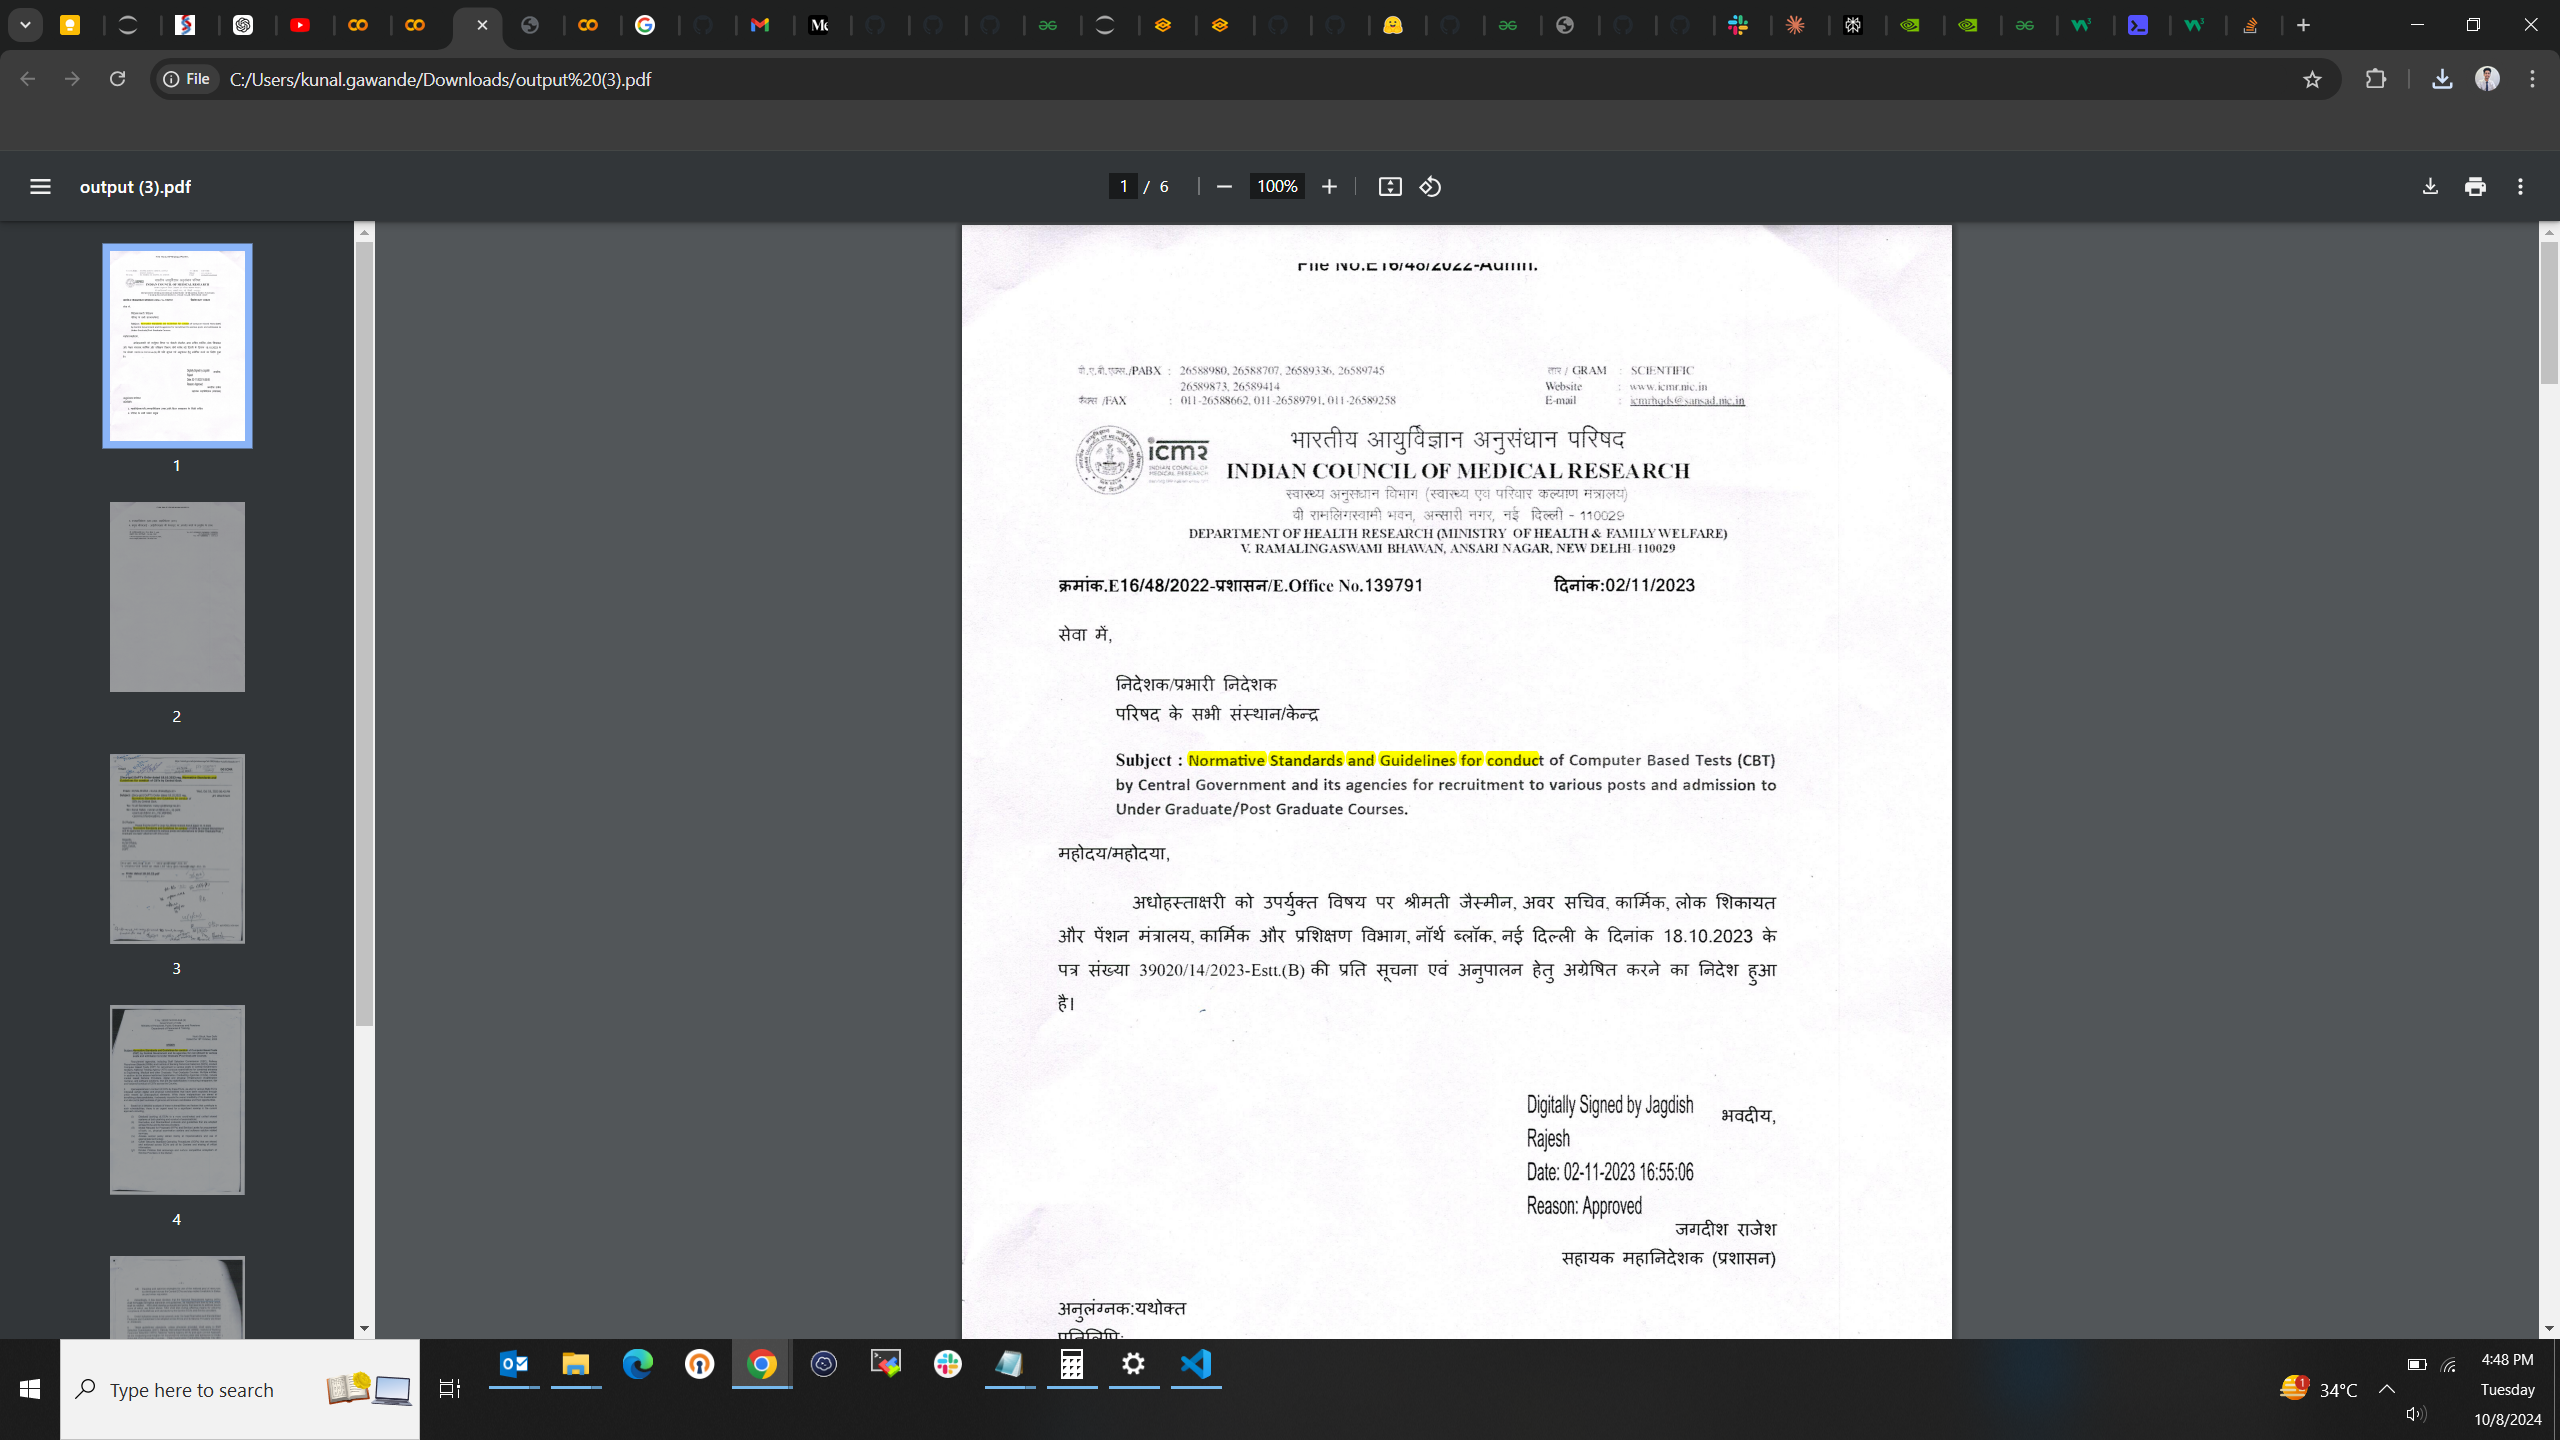

In [123]:
!pip install pymupdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.6/19.6 MB 73.9 MB/s eta 0:00:00


In [127]:
from IPython.display import IFrame

# Example PDF file path
pdf_path = "/content/output.pdf"

# Display the PDF inline
IFrame(pdf_path, width=600, height=800)
